In [1]:
import random
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Hyperparameter, max number of episodes (you can change it for your solution)
EPISODES = 1000

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# ### Main Class for the DQN Agent


class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000) # experience replay size
        self.gamma = 0.95                # discount rate
        self.epsilon = 1.0               # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        
        #~~~~~~~~
        #<Todo> Write your code here
        #~~~~~~~~
        model.add(Dense(24, activation="relu"))
        model.add(Dense(action_size, activation="linear"))
        
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:   # epsilon greedy action
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):       # Experience replay            
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

episode: 0/1000, score: 9, e: 1.0
episode: 1/1000, score: 21, e: 1.0
episode: 2/1000, score: 14, e: 0.93
episode: 3/1000, score: 16, e: 0.86
episode: 4/1000, score: 10, e: 0.82
episode: 5/1000, score: 18, e: 0.75
episode: 6/1000, score: 9, e: 0.71
episode: 7/1000, score: 22, e: 0.64
episode: 8/1000, score: 13, e: 0.6
episode: 9/1000, score: 63, e: 0.44
episode: 10/1000, score: 11, e: 0.41
episode: 11/1000, score: 16, e: 0.38
episode: 12/1000, score: 157, e: 0.17
episode: 13/1000, score: 34, e: 0.15
episode: 14/1000, score: 51, e: 0.11
episode: 15/1000, score: 58, e: 0.085
episode: 16/1000, score: 72, e: 0.059
episode: 17/1000, score: 135, e: 0.03
episode: 18/1000, score: 143, e: 0.015
episode: 19/1000, score: 185, e: 0.01
episode: 20/1000, score: 199, e: 0.01
episode: 21/1000, score: 199, e: 0.01
episode: 22/1000, score: 199, e: 0.01
episode: 23/1000, score: 199, e: 0.01
episode: 24/1000, score: 199, e: 0.01
episode: 25/1000, score: 199, e: 0.01
episode: 26/1000, score: 199, e: 0.01
ep

episode: 214/1000, score: 199, e: 0.01
episode: 215/1000, score: 199, e: 0.01
episode: 216/1000, score: 199, e: 0.01
episode: 217/1000, score: 199, e: 0.01
episode: 218/1000, score: 199, e: 0.01
episode: 219/1000, score: 199, e: 0.01
episode: 220/1000, score: 199, e: 0.01
episode: 221/1000, score: 199, e: 0.01
episode: 222/1000, score: 199, e: 0.01
episode: 223/1000, score: 195, e: 0.01
episode: 224/1000, score: 199, e: 0.01
episode: 225/1000, score: 199, e: 0.01
episode: 226/1000, score: 199, e: 0.01
episode: 227/1000, score: 199, e: 0.01
episode: 228/1000, score: 199, e: 0.01
episode: 229/1000, score: 199, e: 0.01
episode: 230/1000, score: 199, e: 0.01
episode: 231/1000, score: 199, e: 0.01
episode: 232/1000, score: 199, e: 0.01
episode: 233/1000, score: 199, e: 0.01
episode: 234/1000, score: 199, e: 0.01
episode: 235/1000, score: 199, e: 0.01
episode: 236/1000, score: 199, e: 0.01
episode: 237/1000, score: 199, e: 0.01
episode: 238/1000, score: 195, e: 0.01
episode: 239/1000, score:

episode: 428/1000, score: 199, e: 0.01
episode: 429/1000, score: 199, e: 0.01
episode: 430/1000, score: 199, e: 0.01
episode: 431/1000, score: 199, e: 0.01
episode: 432/1000, score: 199, e: 0.01
episode: 433/1000, score: 199, e: 0.01
episode: 434/1000, score: 199, e: 0.01
episode: 435/1000, score: 199, e: 0.01
episode: 436/1000, score: 199, e: 0.01
episode: 437/1000, score: 199, e: 0.01
episode: 438/1000, score: 199, e: 0.01
episode: 439/1000, score: 199, e: 0.01
episode: 440/1000, score: 199, e: 0.01
episode: 441/1000, score: 199, e: 0.01
episode: 442/1000, score: 199, e: 0.01
episode: 443/1000, score: 199, e: 0.01
episode: 444/1000, score: 199, e: 0.01
episode: 445/1000, score: 199, e: 0.01
episode: 446/1000, score: 199, e: 0.01
episode: 447/1000, score: 183, e: 0.01
episode: 448/1000, score: 191, e: 0.01
episode: 449/1000, score: 199, e: 0.01
episode: 450/1000, score: 199, e: 0.01
episode: 451/1000, score: 199, e: 0.01
episode: 452/1000, score: 199, e: 0.01
episode: 453/1000, score:

episode: 640/1000, score: 199, e: 0.01
episode: 641/1000, score: 199, e: 0.01
episode: 642/1000, score: 197, e: 0.01
episode: 643/1000, score: 199, e: 0.01
episode: 644/1000, score: 199, e: 0.01
episode: 645/1000, score: 199, e: 0.01
episode: 646/1000, score: 199, e: 0.01
episode: 647/1000, score: 199, e: 0.01
episode: 648/1000, score: 199, e: 0.01
episode: 649/1000, score: 199, e: 0.01
episode: 650/1000, score: 199, e: 0.01
episode: 651/1000, score: 199, e: 0.01
episode: 652/1000, score: 199, e: 0.01
episode: 653/1000, score: 199, e: 0.01
episode: 654/1000, score: 199, e: 0.01
episode: 655/1000, score: 191, e: 0.01
episode: 656/1000, score: 199, e: 0.01
episode: 657/1000, score: 199, e: 0.01
episode: 658/1000, score: 199, e: 0.01
episode: 659/1000, score: 199, e: 0.01
episode: 660/1000, score: 199, e: 0.01
episode: 661/1000, score: 199, e: 0.01
episode: 662/1000, score: 199, e: 0.01
episode: 663/1000, score: 199, e: 0.01
episode: 664/1000, score: 199, e: 0.01
episode: 665/1000, score:

episode: 851/1000, score: 199, e: 0.01
episode: 852/1000, score: 195, e: 0.01
episode: 853/1000, score: 199, e: 0.01
episode: 854/1000, score: 175, e: 0.01
episode: 855/1000, score: 199, e: 0.01
episode: 856/1000, score: 199, e: 0.01
episode: 857/1000, score: 199, e: 0.01
episode: 858/1000, score: 199, e: 0.01
episode: 859/1000, score: 199, e: 0.01
episode: 860/1000, score: 199, e: 0.01
episode: 861/1000, score: 199, e: 0.01
episode: 862/1000, score: 199, e: 0.01
episode: 863/1000, score: 199, e: 0.01
episode: 864/1000, score: 199, e: 0.01
episode: 865/1000, score: 199, e: 0.01
episode: 866/1000, score: 199, e: 0.01
episode: 867/1000, score: 199, e: 0.01
episode: 868/1000, score: 199, e: 0.01
episode: 869/1000, score: 199, e: 0.01
episode: 870/1000, score: 199, e: 0.01
episode: 871/1000, score: 199, e: 0.01
episode: 872/1000, score: 199, e: 0.01
episode: 873/1000, score: 199, e: 0.01
episode: 874/1000, score: 199, e: 0.01
episode: 875/1000, score: 199, e: 0.01
episode: 876/1000, score:

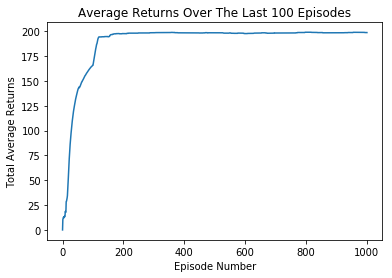

In [4]:
# ### Main Sampling and Training Loop

if __name__ == "__main__":
    # See domain definition of cartpole here: https://gym.openai.com/envs/CartPole-v0/
    env = gym.make('CartPole-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    done = False
    batch_size = 32
    
    rewardsArr = []

    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        for time in range(500):
            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                prev=time
                rewardsArr.append(time)
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))  
                break
            if len(agent.memory) > batch_size and prev<170:
                agent.replay(batch_size)
                

avgreturns = []
for i in range(len(rewardsArr)):
    if i < 100:
        rewardsSum = 0
        for j in range(i):
            rewardsSum += rewardsArr[i-j]
        avgreturns.append(rewardsSum/(i+1))
    if i >= 99:
        rewardsSum = 0
        for j in range(100):
            rewardsSum += rewardsArr[i-j]
        avgreturns.append(rewardsSum/100)

plt.plot(avgreturns)
plt.title('Average Returns Over The Last 100 Episodes')
plt.ylabel('Total Average Returns')
plt.xlabel('Episode Number')
plt.show()